In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv(r"C:\Users\rasgu\OneDrive\Documents\VS Code\ml\datasets\Social_Network_Ads.csv")
dataset.head(5)
#prchased is 0 & 1=classification

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

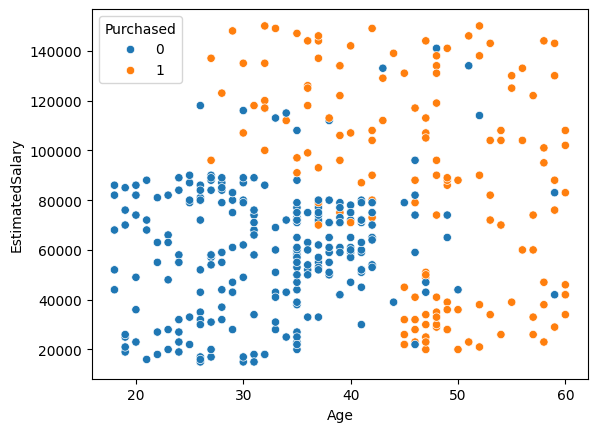

In [ ]:
sns.scatterplot(x="Age", y="EstimatedSalary", data=dataset, hue="Purchased")
plt.show()
#graph gets splitted according to hue parameter ie Purchased

In [5]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x), columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=3)
#change neighbour value to get better accuracy
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.score(x_test, y_test)*100

93.75

In [19]:
#check overfitting
knn.score(x_train, y_train)*100

91.875

In [28]:
results=[]

for i in range(1,30):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train, y_train)

    results.append({
    "k":i, 
    "knn_train":knn1.score(x_train, y_train)*100, 
    "knn_test":knn1.score(x_test, y_test)*100
    })
    
knn_data=pd.DataFrame(results)
print(knn_data)

     k  knn_train  knn_test
0    1    99.6875     85.00
1    2    91.5625     86.25
2    3    92.5000     91.25
3    4    91.8750     92.50
4    5    90.9375     92.50
5    6    90.9375     90.00
6    7    91.8750     93.75
7    8    90.6250     92.50
8    9    91.2500     93.75
9   10    90.6250     92.50
10  11    90.9375     92.50
11  12    91.2500     92.50
12  13    91.5625     92.50
13  14    90.6250     92.50
14  15    90.6250     92.50
15  16    90.0000     92.50
16  17    90.6250     92.50
17  18    90.0000     92.50
18  19    90.9375     92.50
19  20    90.0000     93.75
20  21    90.3125     92.50
21  22    90.0000     93.75
22  23    90.3125     93.75
23  24    89.3750     93.75
24  25    90.0000     93.75
25  26    89.3750     93.75
26  27    89.3750     92.50
27  28    88.7500     93.75
28  29    88.7500     93.75


In [31]:
knn.predict([[-1.781797, -1.490046]])

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [33]:
knn.predict([[1.083596, -0.990844]])

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [34]:
from mlxtend.plotting import plot_decision_regions

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


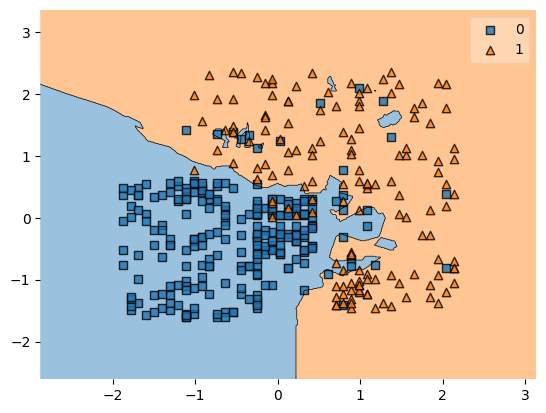

In [35]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)
plt.show()